In [2]:
import pymc3 as pm
import numpy as np
import pandas as pd
from scipy import stats
# R-like interface, alternatively you can import statsmodels as import statsmodels.api as sm
import statsmodels.api as smf 
#import statsmodels.api as sm
import matplotlib.pyplot as plt
import theano
import arviz as az
import random

from scipy.special import logsumexp

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
az.style.use('arviz-darkgrid')

/Users/benjaminwee/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## 6M2
Model averaging: Averaging predictions based on Akaike weights. Lose parameter interpretation as we don't _average_ parameter distributions.

Model Selection: Pick the 'best' performing model based on out of sample deviance/information criteria. Lose out on information or predictive power of other models.

## 6M3
Models fit to less observations will most likely have a better WAIC score because its been asked to make less predictions.

# Hard

In [3]:
# Load in Data for 'hard' problem set
d = pd.read_csv('/Users/benjaminwee/Documents/courses/resources/Rethinking/Data/Howell1.csv',
               sep = ';')
d['age'] = (d['age'] - np.mean(d['age'])) / np.std(d['age'])

i = d.sample(n = int(len(d) / 2)).index

d1 = d[d.index.isin(i)]
d2 = d[~d.index.isin(i)]

## 6H1

In [4]:
a_start = np.mean(d['weight'])
sigma_start = np.std(d['weight'])

In [53]:
# Use weakly regularising priors
with pm.Model() as m_1:
    a = pm.Normal('a', mu = 0, sd = 10, testval = a_start)
    b = pm.Normal('b', mu = 0, sd = 100)
    mu = pm.Deterministic('mu', a + b * d1.age)
    sigma = pm.HalfCauchy('sigma', beta = 10, testval = sigma_start)
    weight = pm.Normal('weight', mu = mu, sd = sigma, observed = d1['weight'])
    trace_m_1 = pm.sample(1000, tune = 1000)

with pm.Model() as m_2:
    a = pm.Normal('a', mu = 0, sd = 10, testval = a_start)
    b = pm.Normal('b', mu = 0, sd = 100, shape = 2)
    mu = pm.Deterministic('mu', a + b[0] * d1.age + b[1] * d1.age**2)
    sigma = pm.HalfCauchy('sigma', beta = 10, testval = sigma_start)
    weight = pm.Normal('weight', mu = mu, sd = sigma, observed = d1['weight'])
    trace_m_2 = pm.sample(1000, tune = 1000)
    
with pm.Model() as m_3:
    a = pm.Normal('a', mu = 0, sd = 10, testval = a_start)
    b = pm.Normal('b', mu = 0, sd = 100, shape = 3)
    mu = pm.Deterministic('mu', a + b[0] * d1.age + b[1] * d1.age**2 +b[2] * d1.age**3)
    sigma = pm.HalfCauchy('sigma', beta = 10, testval = sigma_start)
    weight = pm.Normal('weight', mu = mu, sd = sigma, observed = d1['weight'])
    trace_m_3 = pm.sample(1000, tune = 1000)
    
with pm.Model() as m_4:
    a = pm.Normal('a', mu = 0, sd = 10, testval = a_start)
    b = pm.Normal('b', mu = 0, sd = 100, shape = 4)
    mu = pm.Deterministic('mu', a + b[0] * d1.age + b[1] * d1.age**2 + b[2] * d1.age**3 + b[3] * d1.age**4)
    sigma = pm.HalfCauchy('sigma', beta = 10, testval = sigma_start)
    weight = pm.Normal('weight', mu = mu, sd = sigma, observed = d1['weight'])
    trace_m_4 = pm.sample(1000, tune = 1000)
    
with pm.Model() as m_5:
    a = pm.Normal('a', mu = 0, sd = 10, testval = a_start)
    b = pm.Normal('b', mu = 0, sd = 100, shape = 5)
    mu = pm.Deterministic('mu', a + b[0] * d1.age + b[1] * d1.age**2 + b[2] * d1.age**3 + b[3] * d1.age**4 + b[4] * d1.age**5)
    sigma = pm.HalfCauchy('sigma', beta = 10, testval = sigma_start)
    weight = pm.Normal('weight', mu = mu, sd = sigma, observed = d1['weight'])
    trace_m_5 = pm.sample(1000, tune = 1000)
    
with pm.Model() as m_6:
    a = pm.Normal('a', mu = 0, sd = 10, testval = a_start)
    b = pm.Normal('b', mu = 0, sd = 100, shape = 6)
    mu = pm.Deterministic('mu', a + b[0] * d1.age + b[1] * d1.age**2 + b[2] * d1.age**3 + b[3] * d1.age**4 + b[4] * d1.age**5 + b[5] * d1.age**6)
    sigma = pm.HalfCauchy('sigma', beta = 10, testval = sigma_start)
    weight = pm.Normal('weight', mu = mu, sd = sigma, observed = d1['weight'])
    trace_m_6 = pm.sample(1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:02<00:00, 3066.33draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:03<00:00, 2521.88draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:05<00:00, 1479.86draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:10<00:00, 759.10draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]
Sa

## 6H1

In [54]:
# BMA: Bayesian Model Averaging
compare_models = az.compare({'m_1' : trace_m_1,
                             'm_2' : trace_m_2,
                             'm_3' : trace_m_3,
                             'm_4' : trace_m_4,
                             'm_5' : trace_m_5,
                             'm_6' : trace_m_6},
                           method = 'pseudo-BMA') 

compare_models

/Users/benjaminwee/anaconda/lib/python3.6/site-packages/arviz/stats/stats.py:1126: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
m_6,0,1717.46,6.47336,0,0.999999,24.0709,0,True,deviance
m_5,1,1745.46,7.3621,27.9997,8.31633e-07,25.3726,9.83126,True,deviance
m_3,2,1747.82,4.54522,30.3624,2.55203e-07,24.6794,8.93083,False,deviance
m_4,3,1748.64,5.22066,31.1775,1.69786e-07,25.2286,9.40713,False,deviance
m_2,4,1838.85,6.44947,121.391,4.36712e-27,31.9375,25.9368,True,deviance
m_1,5,2071.75,2.9745,354.288,1.16757e-77,19.0808,23.568,False,deviance


# 6H2

In [71]:
post_pred_1 = pm.sample_posterior_predictive(trace_m_1, 
                                             samples=10000, 
                                             model=m_1)

post_pred_2 = pm.sample_posterior_predictive(trace_m_2, 
                                             samples=10000, 
                                             model=m_2)

post_pred_3 = pm.sample_posterior_predictive(trace_m_3, 
                                             samples=10000, 
                                             model=m_3)

post_pred_4 = pm.sample_posterior_predictive(trace_m_4, 
                                             samples=10000, 
                                             model=m_4)

post_pred_5 = pm.sample_posterior_predictive(trace_m_5, 
                                             samples=10000, 
                                             model=m_5)

post_pred_6 = pm.sample_posterior_predictive(trace_m_6, 
                                             samples=10000, 
                                             model=m_6)

100%|██████████| 10000/10000 [00:09<00:00, 1009.70it/s]


In [7]:
trace_list = [trace_m_1, 
              trace_m_2, 
              trace_m_3,
              trace_m_4,
              trace_m_5,
              trace_m_6]

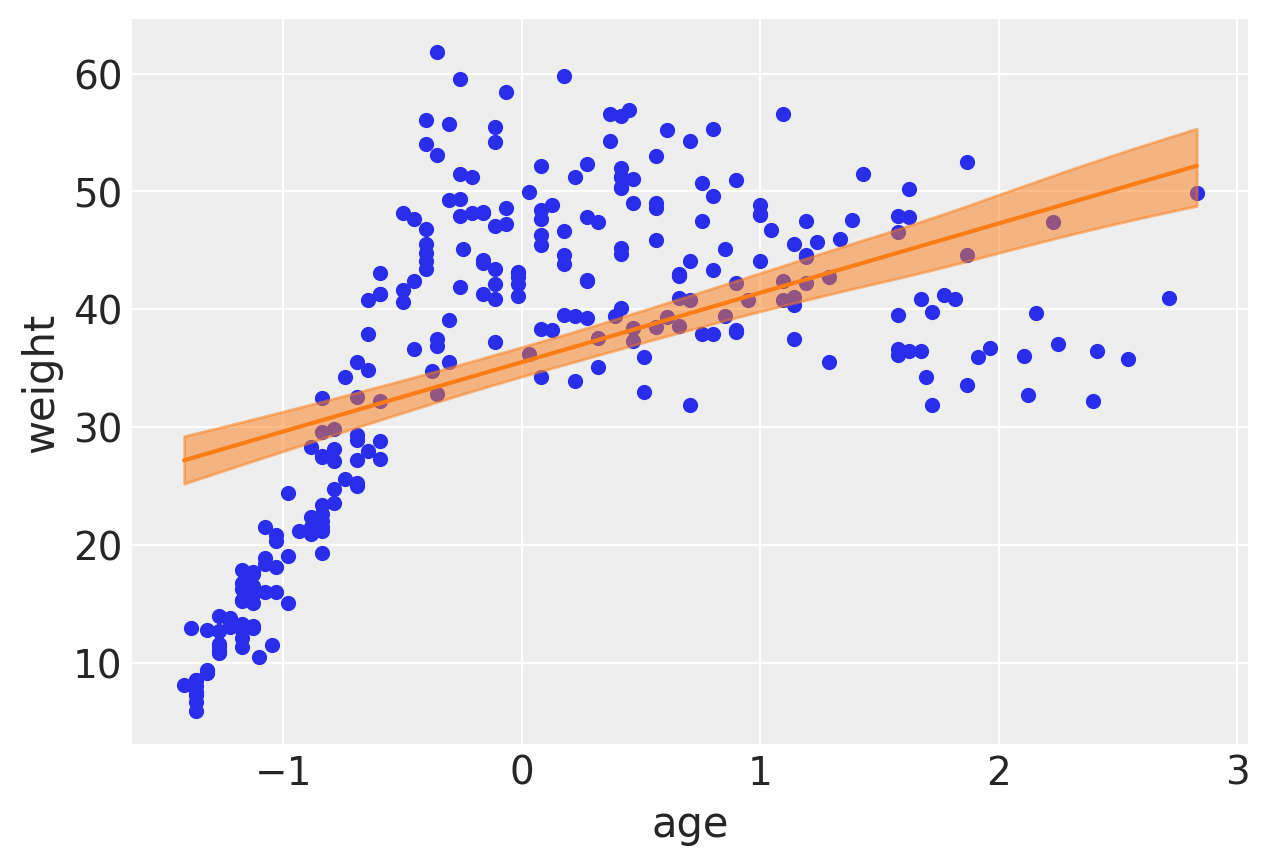

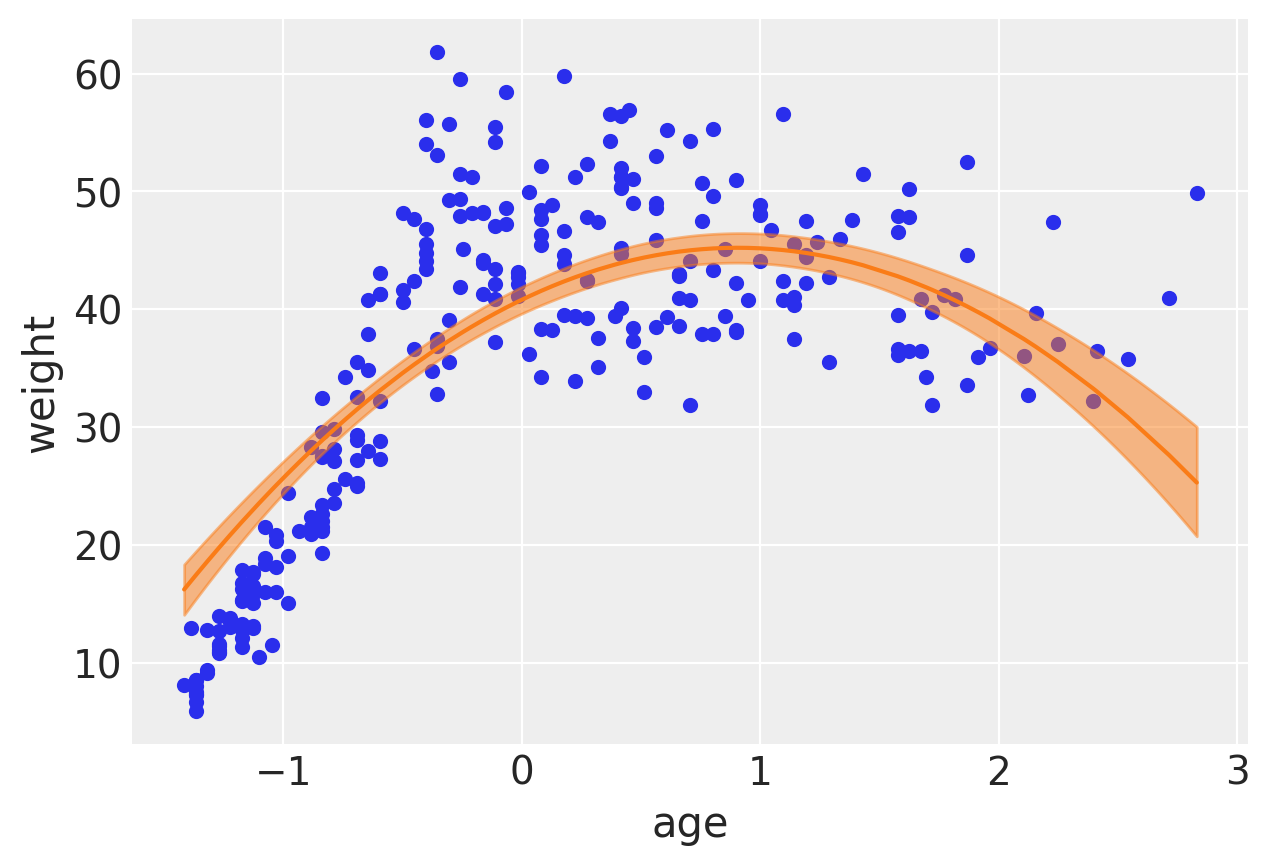

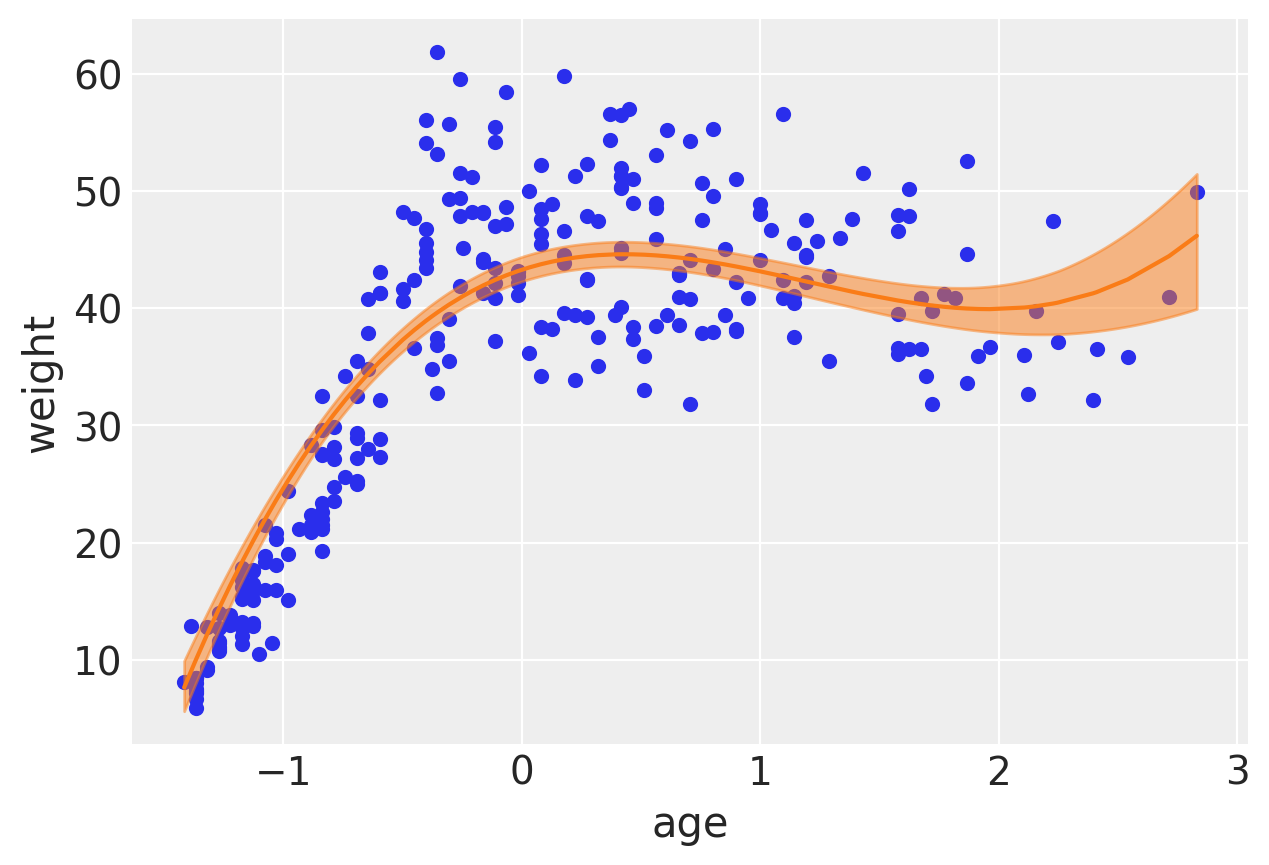

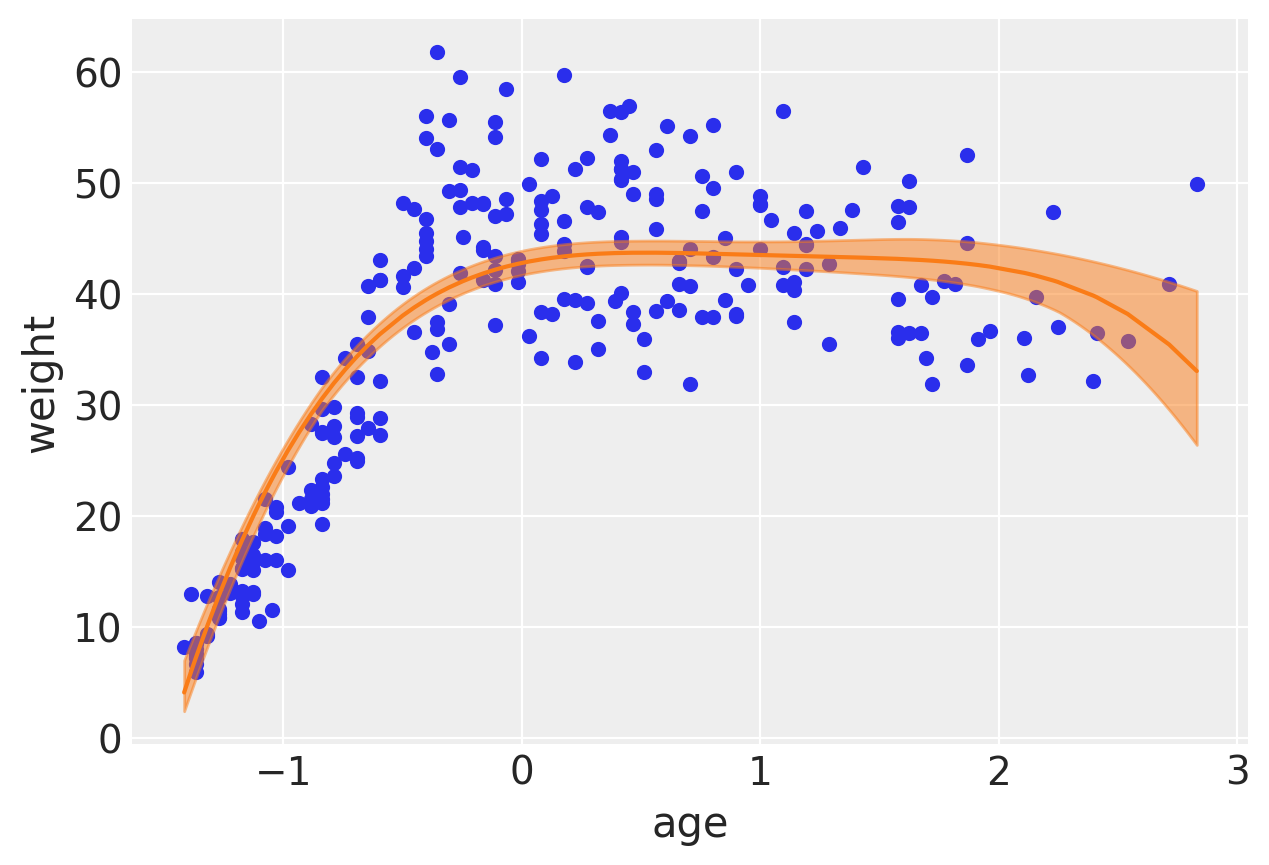

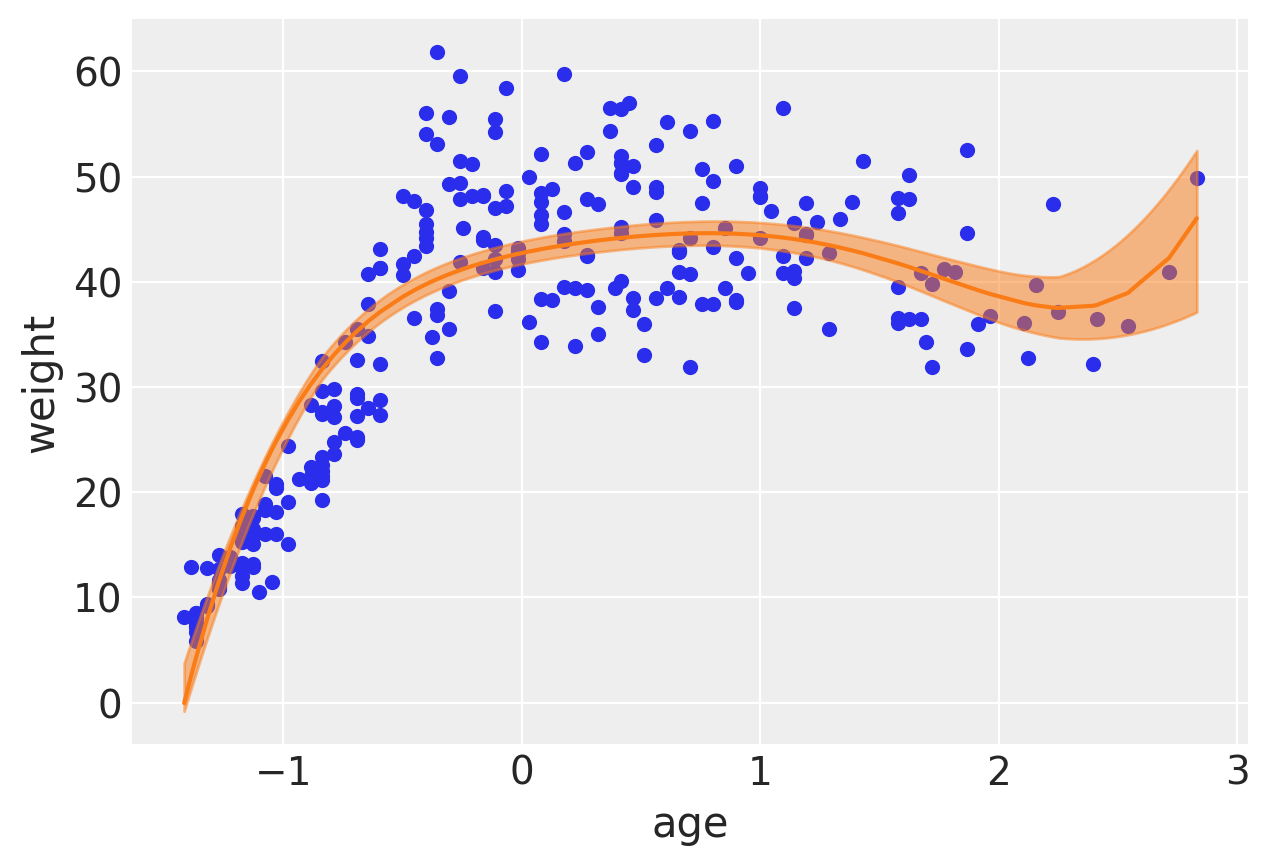

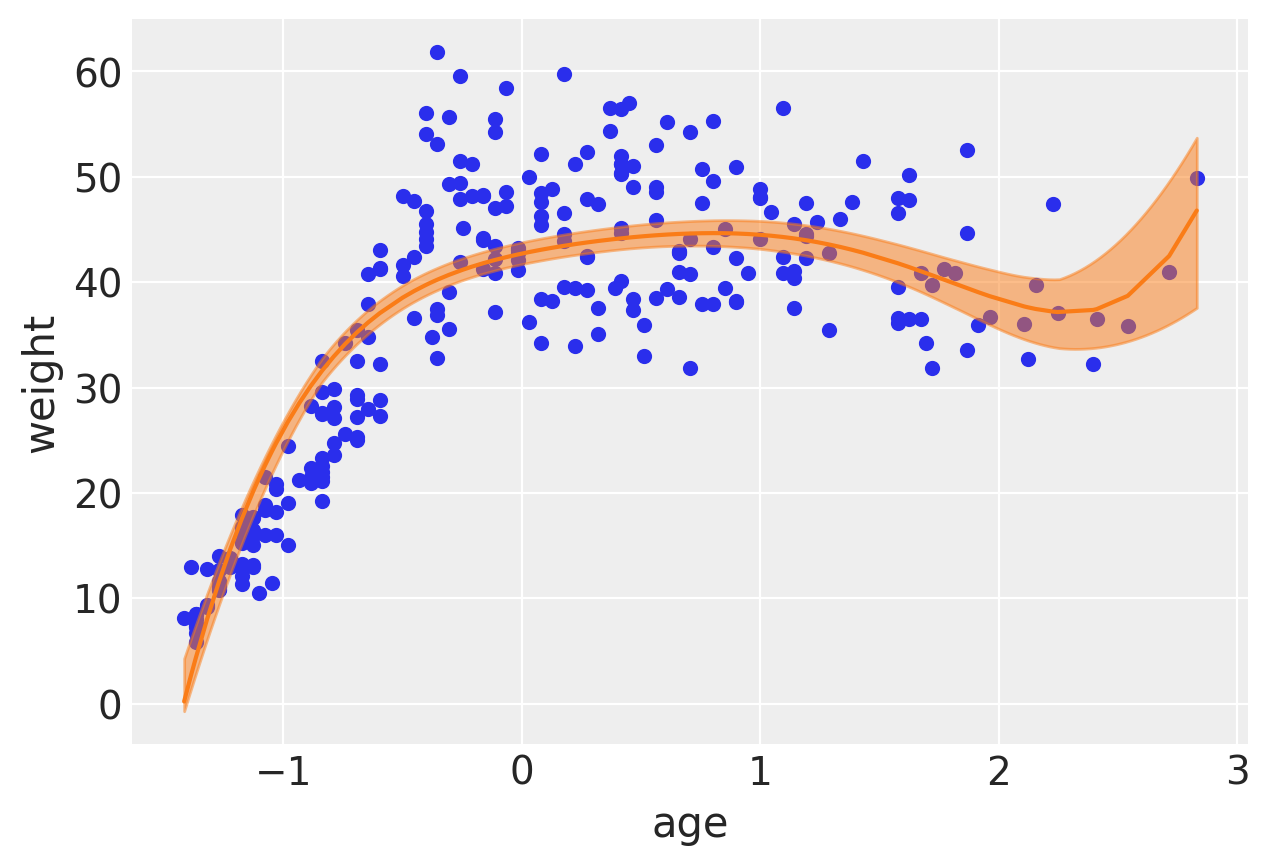

In [55]:
d1['age'].reset_index(inplace=True, drop=True) 
for trace in trace_list:
    plot_df = pd.concat([d1.age, pd.Series(trace['mu'].mean(0))], axis=1).sort_values(by=['age'])
    
    d1.plot('age', 'weight', kind = 'scatter')
    plt.plot(plot_df.iloc[:, [0]], plot_df.iloc[:, [1]], 'C1')
    az.plot_hpd(d1['age'], trace['mu'])

## 6H3

Posterior predictions look the same because the best performing model has akaike weight of 0.99

In [65]:
models = [m_1,
          m_2,
          m_3,
          m_4,
          m_5,
          m_6]

In [66]:
ensemble = pm.sample_posterior_predictive_w(trace_list, 
                                           10000,
                                           models,
                                           weights = compare_models.weight.sort_index(ascending=True))

100%|██████████| 10000/10000 [00:11<00:00, 876.09it/s]


In [67]:
post_pred_3 = pm.sample_posterior_predictive(trace_m_3, 
                                             samples=10000, 
                                             model=m_3)

100%|██████████| 10000/10000 [00:09<00:00, 1006.90it/s]


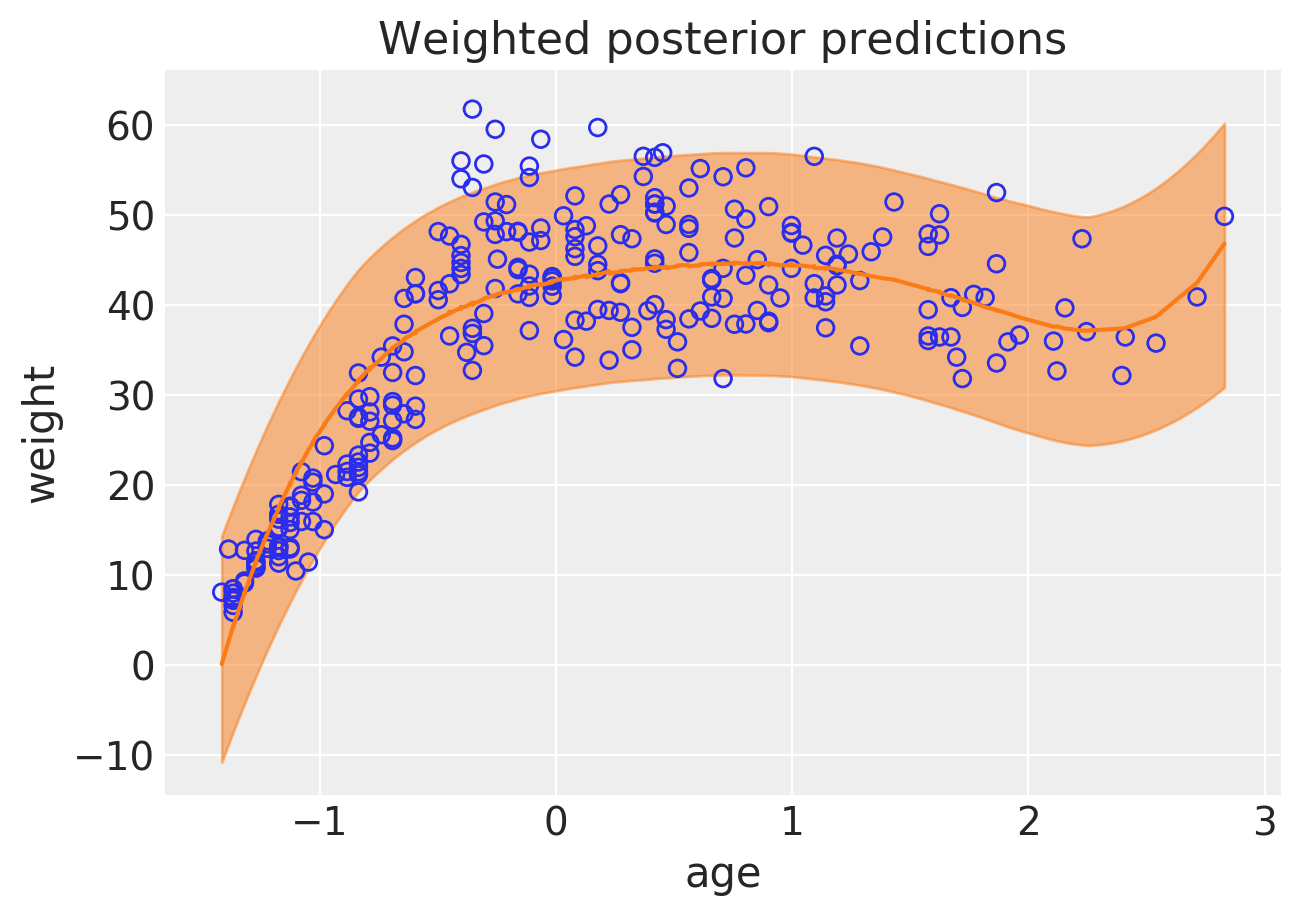

In [68]:
plot_df = pd.concat([d1.age, pd.Series(ensemble['weight'].mean(0))], axis=1).sort_values(by=['age'])
plot_df['age'].reset_index(inplace=True, drop=True)

plt.plot(plot_df.age, plot_df.iloc[:, [1]], color = 'C1')
az.plot_hpd(d1.age, ensemble['weight'])
plt.scatter(d1.age, d1.weight, facecolor='None', edgecolors='C0')
plt.xlabel('age')
plt.ylabel('weight')
plt.title('Weighted posterior predictions');

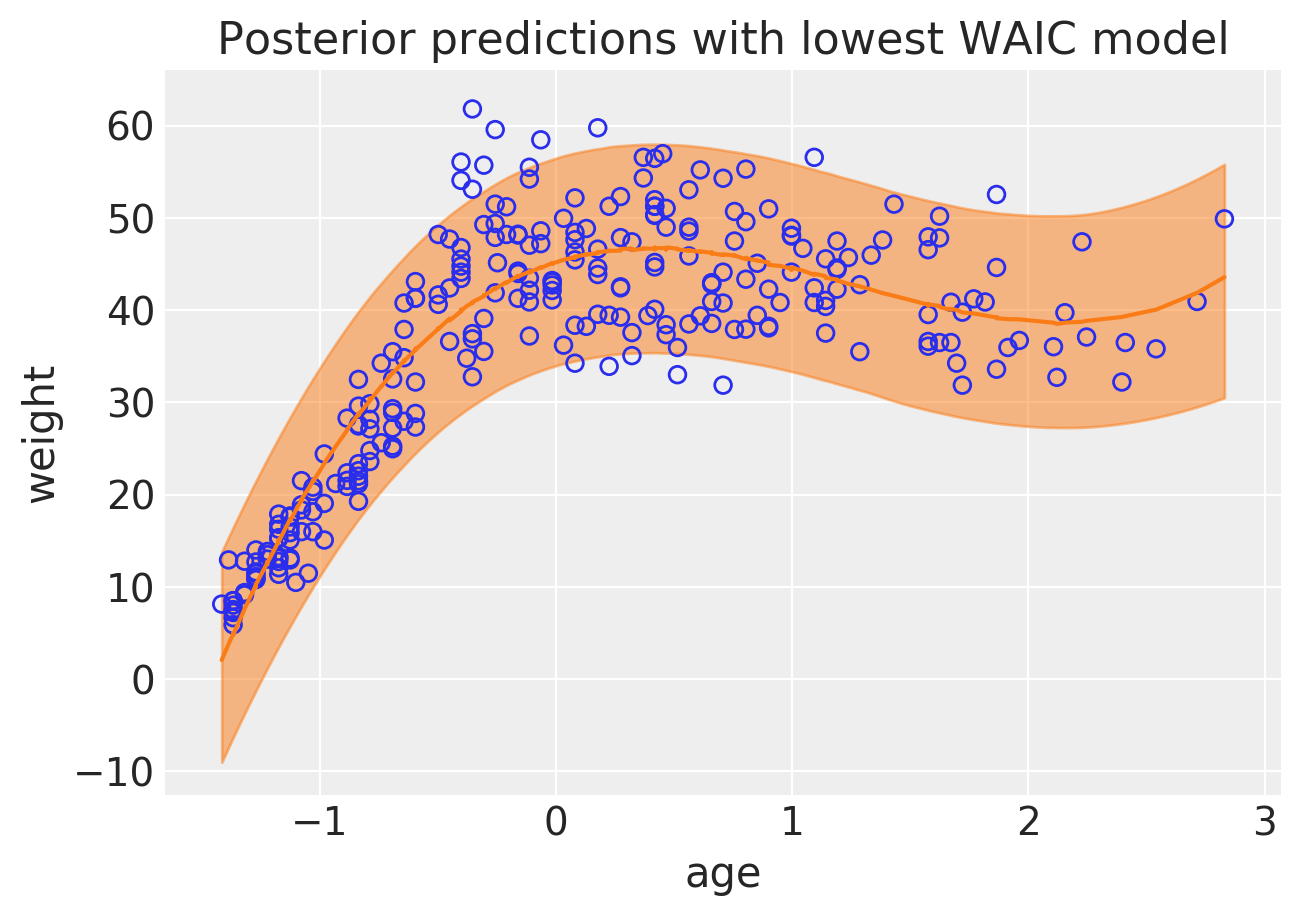

In [69]:
plot_df_m3 = pd.concat([d1.age, pd.Series(post_pred_3['weight'].mean(0))], axis=1).sort_values(by=['age'])
plot_df_m3['age'].reset_index(inplace=True, drop=True)

plt.plot(plot_df_m3.age, plot_df_m3.iloc[:, [1]], color = 'C1')
az.plot_hpd(d1.age, post_pred_3['weight'])
plt.scatter(d1.age, d1.weight, facecolor='None', edgecolors='C0')
plt.xlabel('age')
plt.ylabel('weight');
plt.title('Posterior predictions with lowest WAIC model');

## 6H4

In [60]:
az.summary(trace_m_1)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a,35.414,0.660,34.245,36.670,0.008,0.006,6181.0,6167.0,6191.0,2833.0,1.0
b,8.629,0.663,7.342,9.876,0.008,0.006,6211.0,6125.0,6238.0,2803.0,1.0
mu[0],49.426,1.254,47.092,51.782,0.015,0.011,6752.0,6752.0,6787.0,3264.0,1.0
mu[1],49.426,1.254,47.092,51.782,0.015,0.011,6752.0,6752.0,6787.0,3264.0,1.0
mu[2],50.258,1.308,47.839,52.716,0.016,0.011,6745.0,6745.0,6780.0,2932.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
mu[268],23.614,1.131,21.415,25.659,0.015,0.010,5920.0,5911.0,5878.0,3111.0,1.0
mu[269],36.103,0.662,34.879,37.327,0.008,0.006,6214.0,6201.0,6219.0,2829.0,1.0
mu[270],31.940,0.716,30.640,33.329,0.009,0.007,5980.0,5959.0,6000.0,3181.0,1.0
mu[271],51.507,1.392,48.939,54.138,0.017,0.012,6734.0,6734.0,6760.0,3026.0,1.0


In [61]:
theta_m_1 = az.summary(trace_m_1)['mean'].filter(regex = '^((?!mu).)*$')
theta_m_2 = az.summary(trace_m_2)['mean'].filter(regex = '^((?!mu).)*$')
theta_m_3 = az.summary(trace_m_3)['mean'].filter(regex = '^((?!mu).)*$')
theta_m_4 = az.summary(trace_m_4)['mean'].filter(regex = '^((?!mu).)*$')
theta_m_5 = az.summary(trace_m_5)['mean'].filter(regex = '^((?!mu).)*$')
theta_m_6 = az.summary(trace_m_6)['mean'].filter(regex = '^((?!mu).)*$')

In [62]:
dev_m_1 = -2 * sum(stats.norm.logpdf(d2['weight'],
                                    loc = theta_m_1['a'] +
                                          theta_m_1['b'] * d2['age'],
                                    scale = theta_m_1['sigma']))

dev_m_2 = -2 * sum(stats.norm.logpdf(d2['weight'],
                                    loc = theta_m_2['a'] +
                                          theta_m_2['b[0]'] * d2['age'] +
                                          theta_m_2['b[1]'] * d2['age']**2,
                                    scale = theta_m_2['sigma']))

dev_m_3 = -2 * sum(stats.norm.logpdf(d2['weight'],
                                    loc = theta_m_3['a'] +
                                          theta_m_3['b[0]'] * d2['age'] +
                                          theta_m_3['b[1]'] * d2['age']**2 +
                                          theta_m_3['b[2]'] * d2['age']**3,
                                    scale = theta_m_3['sigma']))

dev_m_4 = -2 * sum(stats.norm.logpdf(d2['weight'],
                                    loc = theta_m_4['a'] +
                                          theta_m_4['b[0]'] * d2['age'] +
                                          theta_m_4['b[1]'] * d2['age']**2 +
                                          theta_m_4['b[2]'] * d2['age']**3 +
                                          theta_m_4['b[3]'] * d2['age']**4,
                                    scale = theta_m_4['sigma']))

dev_m_5 = -2 * sum(stats.norm.logpdf(d2['weight'],
                                    loc = theta_m_5['a'] +
                                          theta_m_5['b[0]'] * d2['age'] +
                                          theta_m_5['b[1]'] * d2['age']**2 +
                                          theta_m_5['b[2]'] * d2['age']**3 +
                                          theta_m_5['b[3]'] * d2['age']**4 +
                                          theta_m_5['b[4]'] * d2['age']**5,
                                    scale = theta_m_5['sigma']))

dev_m_6 = -2 * sum(stats.norm.logpdf(d2['weight'],
                                    loc = theta_m_6['a'] +
                                          theta_m_6['b[0]'] * d2['age'] +
                                          theta_m_6['b[1]'] * d2['age']**2 +
                                          theta_m_6['b[2]'] * d2['age']**3 +
                                          theta_m_6['b[3]'] * d2['age']**4 +
                                          theta_m_6['b[4]'] * d2['age']**5 +
                                          theta_m_6['b[5]'] * d2['age']**6,
                                    scale = theta_m_6['sigma']))


In [64]:
print('Dev 1:', dev_m_1, '\n'
      'Dev 2:', dev_m_2, '\n'
      'Dev 3:', dev_m_3, '\n'
      'Dev 4:', dev_m_4, '\n'
      'Dev 5:', dev_m_5, '\n'
      'Dev 6:', dev_m_6, '\n'
     'Model 5 has the lowest out of sample deviance')

Dev 1: 2076.095041253343 
Dev 2: 1793.0831116058096 
Dev 3: 1744.2967575819735 
Dev 4: 1737.339353531001 
Dev 5: 1722.627316365972 
Dev 6: 1723.5929222706836 
Model 5 has the lowest out of sample deviance


## 6H6

In [75]:
with pm.Model() as m_h6:
    a = pm.Normal('a', mu = 0, sd = 100, testval = a_start)
    b = pm.Normal('b', mu = 0, sd = 5, shape = 6)
    mu = pm.Deterministic('mu', a + b[0] * d1.age + b[1] * d1.age**2 + b[2] * d1.age**3 + b[3] * d1.age**4 + b[4] * d1.age**5 + b[5] * d1.age**6)
    sigma = pm.HalfCauchy('sigma', beta = 10, testval = sigma_start)
    weight = pm.Normal('weight', mu = mu, sd = sigma, observed = d1['weight'])
    trace_m_h6 = pm.sample(1000, tune = 1000)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [01:08<00:00, 117.22draws/s]


In [76]:
az.summary(trace_m_h6)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a,46.234,0.614,45.029,47.332,0.015,0.011,1616.0,1616.0,1612.0,2225.0,1.0
b[0],3.857,1.306,1.445,6.339,0.032,0.022,1711.0,1706.0,1719.0,2068.0,1.0
b[1],-15.904,1.534,-18.699,-12.929,0.043,0.030,1280.0,1277.0,1279.0,1689.0,1.0
b[2],11.639,1.919,8.069,15.367,0.054,0.038,1270.0,1270.0,1271.0,1767.0,1.0
b[3],1.008,0.720,-0.339,2.377,0.018,0.013,1584.0,1527.0,1579.0,1871.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
mu[268],8.736,1.372,6.132,11.258,0.025,0.018,2925.0,2925.0,2943.0,3155.0,1.0
mu[269],46.447,0.607,45.278,47.531,0.015,0.010,1708.0,1708.0,1712.0,2178.0,1.0
mu[270],41.414,0.647,40.197,42.582,0.014,0.010,2086.0,2086.0,2098.0,2412.0,1.0
mu[271],40.062,1.102,37.972,42.057,0.017,0.012,4028.0,4019.0,4029.0,3289.0,1.0


Text(0.5,1,'Posterior mean')

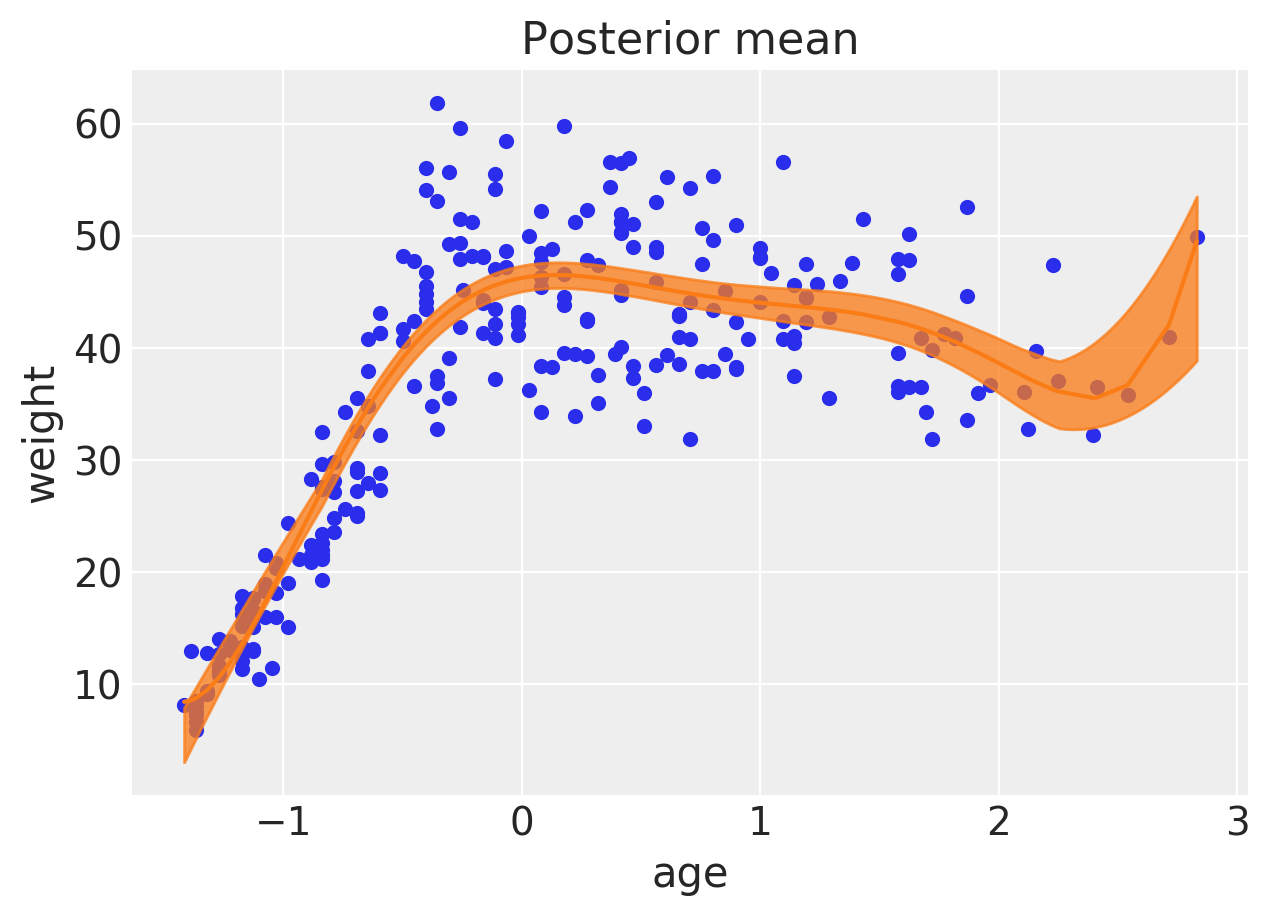

In [80]:
plot_df = pd.concat([d1.age, pd.Series(trace_m_h6['mu'].mean(0))], axis=1).sort_values(by=['age'])
    
d1.plot('age', 'weight', kind = 'scatter')
plt.plot(plot_df.iloc[:, [0]], plot_df.iloc[:, [1]], 'C1')
az.plot_hpd(d1['age'], trace_m_h6['mu'])
az.plot_hpd(d1['age'], trace_m_h6['mu'])
plt.title('Posterior mean')

100%|██████████| 10000/10000 [00:10<00:00, 920.66it/s]


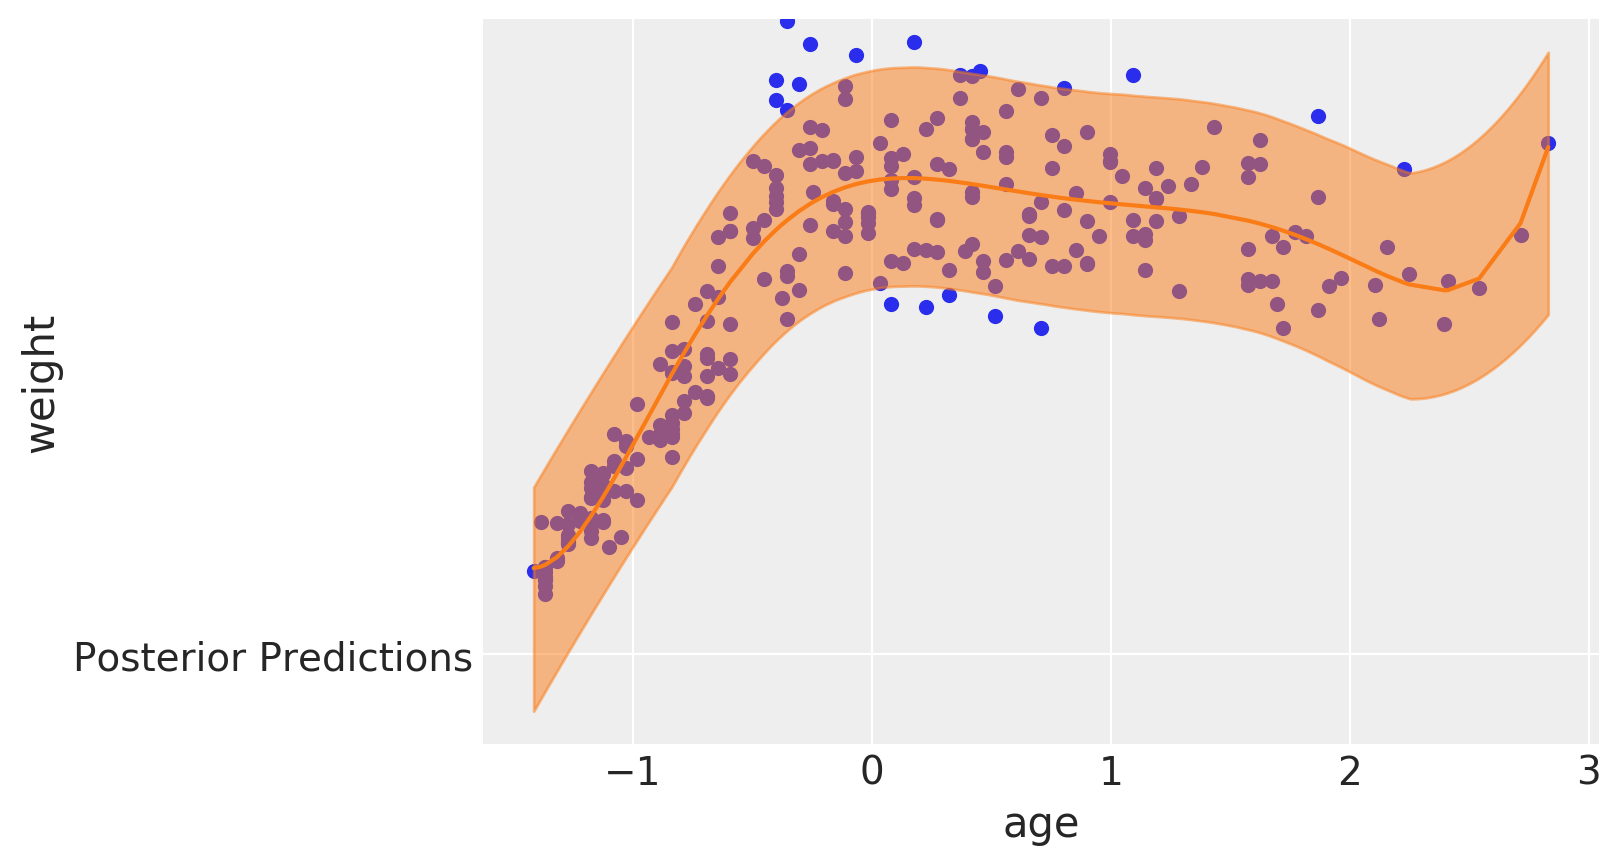

In [81]:
post_pred_h6 = pm.sample_posterior_predictive(trace_m_h6, 
                                             samples=10000, 
                                             model=m_h6)

plot_df = pd.concat([d1.age, pd.Series(trace_m_h6['mu'].mean(0))], axis=1).sort_values(by=['age'])
    
d1.plot('age', 'weight', kind = 'scatter')
plt.plot(plot_df.iloc[:, [0]], plot_df.iloc[:, [1]], 'C1')
az.plot_hpd(d1['age'], post_pred_h6['weight'])
plt.plot('Posterior Predictions')

In [83]:
theta_m_h6 = az.summary(trace_m_h6)['mean'].filter(regex = '^((?!mu).)*$')
dev_m_h6 = -2 * sum(stats.norm.logpdf(d2['weight'],
                                    loc = theta_m_h6['a'] +
                                          theta_m_h6['b[0]'] * d2['age'] +
                                          theta_m_h6['b[1]'] * d2['age']**2 +
                                          theta_m_h6['b[2]'] * d2['age']**3 +
                                          theta_m_h6['b[3]'] * d2['age']**4 +
                                          theta_m_h6['b[4]'] * d2['age']**5 +
                                          theta_m_h6['b[5]'] * d2['age']**6,
                                    scale = theta_m_h6['sigma']))
print('Dev 6:', dev_m_h6, '\n'
     'Deviance with stronger regularising priors performs better out of sample with lower deviance compared to all models with weakly regularising priors')

Dev 6: 1718.555243231419 
Deviance with stronger regularising priors performs better out of sample with lower deviance compared to all models with weakly regularising priors
